In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout, BatchNormalization,GRU,Bidirectional
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("/content/SBIN.NS (1).csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-24,341.850006,344.700012,336.250000,339.600006,319.646606,20823143
1,2019-07-25,341.700012,343.200012,337.399994,341.299988,321.246674,19857643
2,2019-07-26,340.799988,346.149994,340.500000,342.600006,322.470337,16139052
3,2019-07-29,343.950012,346.549988,336.799988,343.799988,323.599792,17060483
4,2019-07-30,344.399994,346.700012,325.850006,327.549988,308.304596,24437235


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

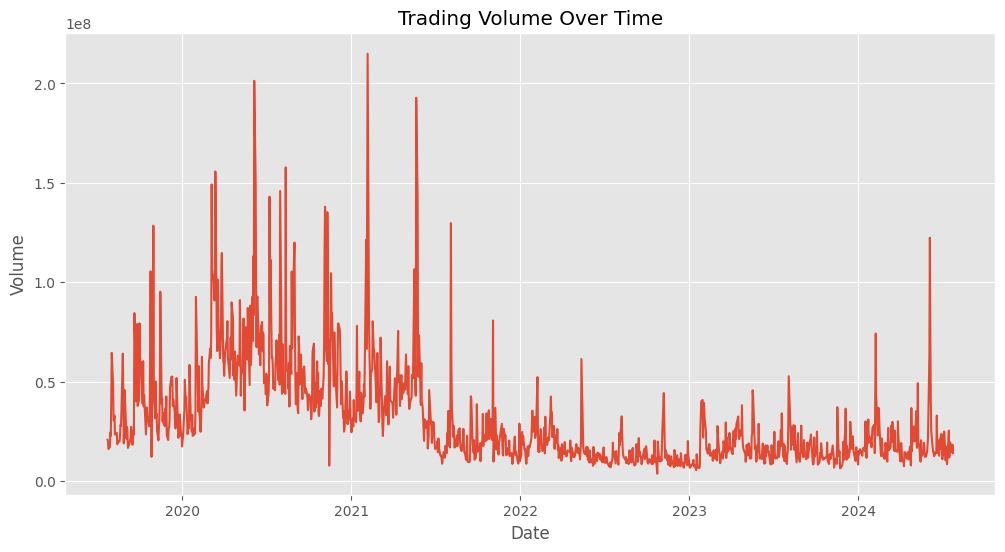

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
_ = plt.title('Trading Volume Over Time')

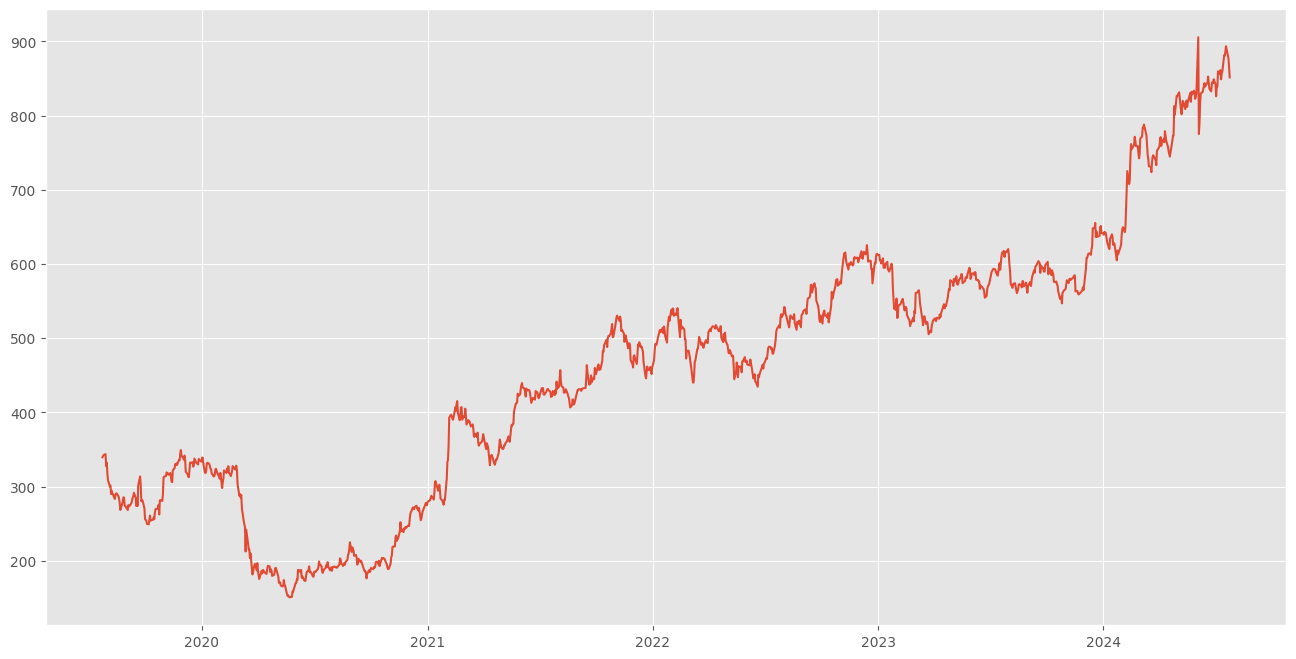

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df['Date'], df['Close'], label='Close Price history')

In [12]:
moving_50 = df['Close'].rolling(window =50).mean()
moving_100 = df['Close'].rolling(window =100).mean()
moving_200 = df['Close'].rolling(window =200).mean()

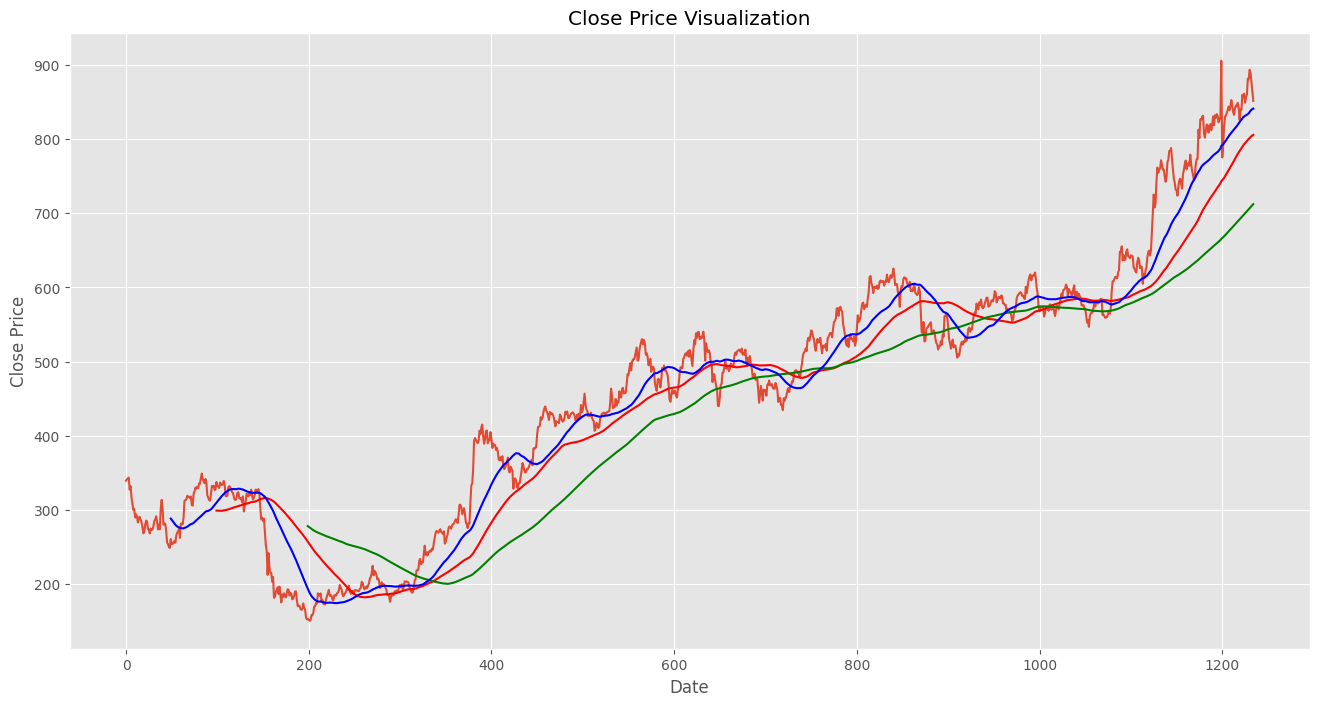

In [13]:
plt.figure(figsize = (16,8))
plt.title("Close Price Visualization")
plt.plot(df['Close'])
plt.plot(moving_100, 'r')
plt.plot(moving_200, 'g')
plt.plot(moving_50, 'b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
train = df[0:int(len(df)*0.8)]
valid = df[int(len(df)*0.8):]

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
training_scalled_data = scaler.fit_transform(train['Close'].values.reshape(-1,1))
valid_scalled_data = scaler.fit_transform(valid['Close'].values.reshape(-1,1))

In [ ]:
x_train = []
y_train = []
steps = 100
for i in range(steps, len(training_scalled_data)):
  x_train.append(training_scalled_data[i-steps:i])
  y_train.append(training_scalled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(888, 100, 1)

In [ ]:
model = Sequential()
model.add(Bidirectional(GRU(units=100, activation='tanh', return_sequences=True), input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Bidirectional(GRU(units=120, activation='tanh', return_sequences=True)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(GRU(units=120, activation='tanh'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mean_squared_error', metrics = ['MAE'])
history = model.fit(x_train, y_train ,epochs = 50)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - MAE: 0.4110 - loss: 0.3205
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - MAE: 0.2235 - loss: 0.0878
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - MAE: 0.1892 - loss: 0.0553
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - MAE: 0.1521 - loss: 0.0378
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - MAE: 0.1475 - loss: 0.0367
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - MAE: 0.1299 - loss: 0.0271
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - MAE: 0.1247 - loss: 0.0258
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - MAE: 0.1139 - loss: 0.0216
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - MAE: 0.1052 - loss: 0.0180
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - MAE: 0.1044 - loss: 0.0186
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - MAE: 0.1012 - loss: 0.0179
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - MAE: 0.0894 - loss: 0.0132
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━

In [ ]:
test_close = valid['Close']
train_close = train['Close']
past_30_days = pd.DataFrame(train_close[-100:])
test_df = pd.DataFrame(test_close)
final_df = pd.concat([past_30_days, test_df], ignore_index=True)
test_data = scaler.fit_transform(final_df)

In [ ]:
x_test = []
y_test = []
for i in range(100, test_data.shape[0]):
   x_test.append(test_data[i-100: i])
   y_test.append(test_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(247, 100, 1)
(247,)


In [ ]:
y_pred = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [ ]:
scale_factor = 1/scaler.scale_[0]
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

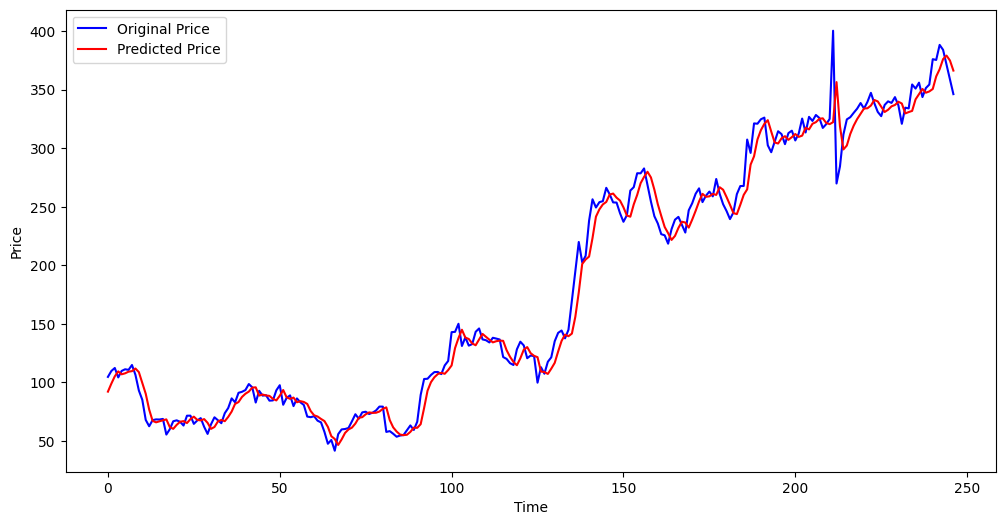

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

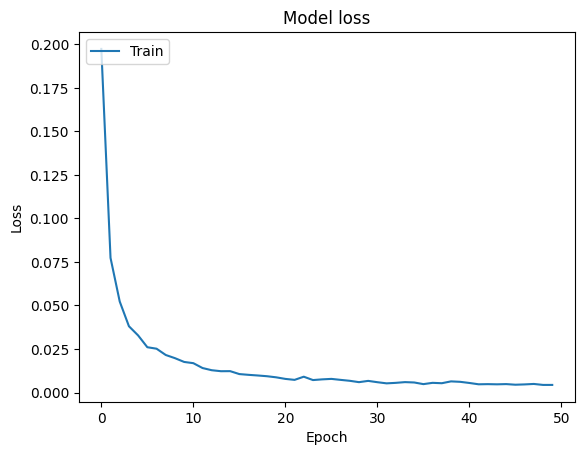

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('MSE:', mse)

R-squared: 0.9837298304944812
MSE: 187.26126920685456


In [ ]:
model.save('SBIN.keras')